# ....................................Genztechs...........................................
# ...................................Assignment 8.......................................
# ...................................Final Project..........................................
# ...............................Data Science Internship.........................
# ....................................Hamza Aslam.......................................

# Project Title:
## Predictive Analytics for Customer Churn in a Subscription Based Business

# Project Steps:
## Step 1: Data Collection

# Import Librariesm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Telco Customer Churn.csv")

# Step 2: Exploratory Data Analysis (EDA)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


 ## Distribution of churn vs. non-churn customers.

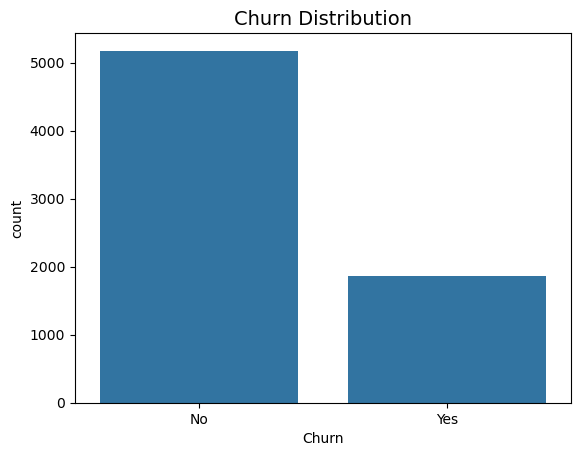

In [6]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution', fontsize= 14)

plt.show()

## Correlation between features and churn.

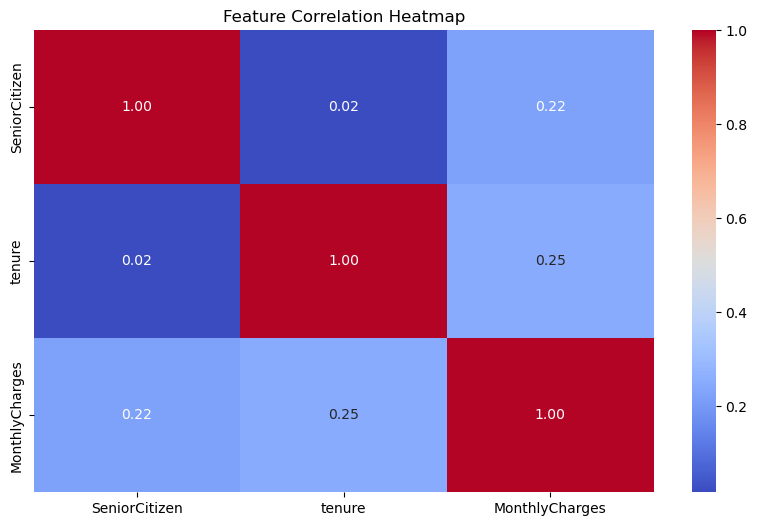

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [8]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

## Trends in customer behavior

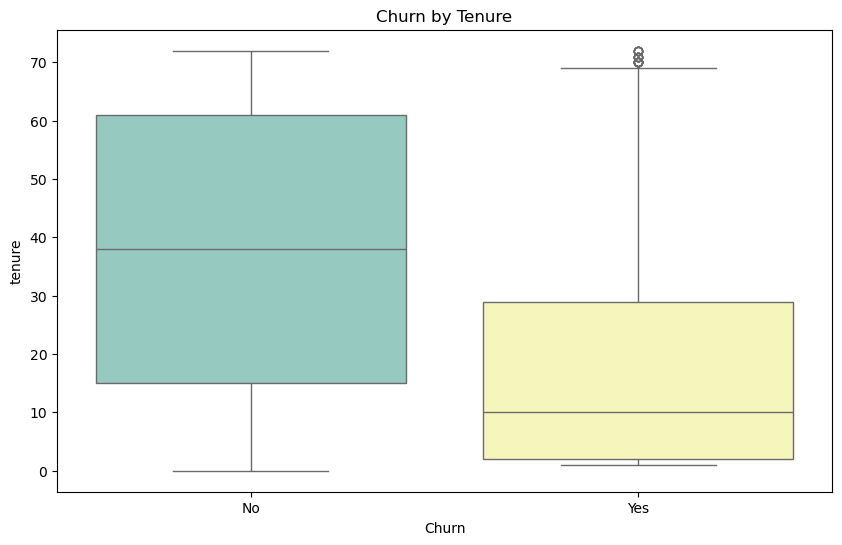

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', hue='Churn', data=df, palette='Set3')
plt.title('Churn by Tenure')
plt.show()

In [10]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

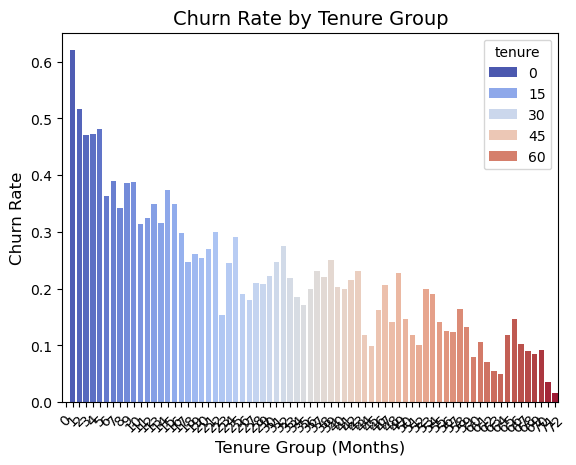

In [11]:
churn_rate_by_tenure_group = df.groupby('tenure')['Churn'].mean()

churn_rate_by_tenure_group = churn_rate_by_tenure_group.reset_index()
df
sns.barplot(data=churn_rate_by_tenure_group, x='tenure', y='Churn',hue='tenure', palette='coolwarm')
plt.title('Churn Rate by Tenure Group', fontsize=14)
plt.xlabel('Tenure Group (Months)', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.xticks(rotation=45)
plt.show()


# Step 3: Data Preprocessing

## Handle missing values and outliers.

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

## check outliers

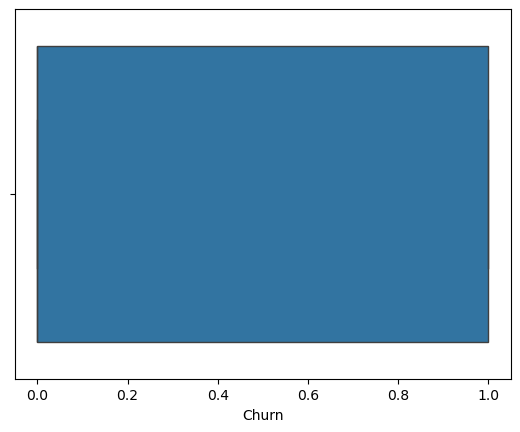

In [14]:
sns.boxplot(x=df['Churn'])
plt.show()

## Encoding categorical variables using OneHotEncoder

In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


## Selecting features(x) and target(y)

In [16]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

## Splitting data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Normalizing numerical features

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train

array([[-0.43947526,  1.46398299,  0.89913786, ..., -0.52160372,
         1.40299244, -0.54768043],
       [-0.43947526,  1.62744402,  1.42201922, ...,  1.91716423,
        -0.71276222, -0.54768043],
       [ 2.27544096, -1.27398928,  0.15382442, ..., -0.52160372,
         1.40299244, -0.54768043],
       ...,
       [-0.43947526, -0.00716629, -1.50113658, ..., -0.52160372,
        -0.71276222, -0.54768043],
       [-0.43947526, -1.27398928, -0.45537386, ..., -0.52160372,
        -0.71276222,  1.82588229],
       [-0.43947526, -0.25235784,  0.14718466, ...,  1.91716423,
        -0.71276222, -0.54768043]])

In [20]:
X_test

array([[-0.43947526, -0.74274093, -0.46035368, ..., -0.52160372,
         1.40299244, -0.54768043],
       [-0.43947526, -0.12976206, -1.49615676, ..., -0.52160372,
        -0.71276222,  1.82588229],
       [-0.43947526, -1.27398928,  0.83937999, ..., -0.52160372,
         1.40299244, -0.54768043],
       ...,
       [-0.43947526,  1.01446515, -0.78072226, ...,  1.91716423,
        -0.71276222, -0.54768043],
       [-0.43947526,  0.81013886,  0.89581798, ...,  1.91716423,
        -0.71276222, -0.54768043],
       [-0.43947526, -1.15139351, -1.16084871, ..., -0.52160372,
         1.40299244, -0.54768043]])

# 4. Model Building

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

## Logistic Regression

In [22]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred_log = log_reg.predict(X_test)
y_pred_log

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [24]:
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_log):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_log):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_log):.2f}")


Logistic Regression Metrics:
Accuracy: 0.80
Precision: 0.75
Recall: 0.33
F1-Score: 0.46
ROC-AUC: 0.65


## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [26]:
rf_model = RandomForestClassifier(n_estimators=20).fit(X_train, y_train)
rf_model

RandomForestClassifier(n_estimators=20)

In [27]:
y_pred_rf = rf_model.predict(X_test)

In [28]:
print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_rf):.2f}")


Random Forest Metrics:
Accuracy: 0.81
Precision: 0.71
Recall: 0.46
F1-Score: 0.56
ROC-AUC: 0.70


## Confusion Matrix

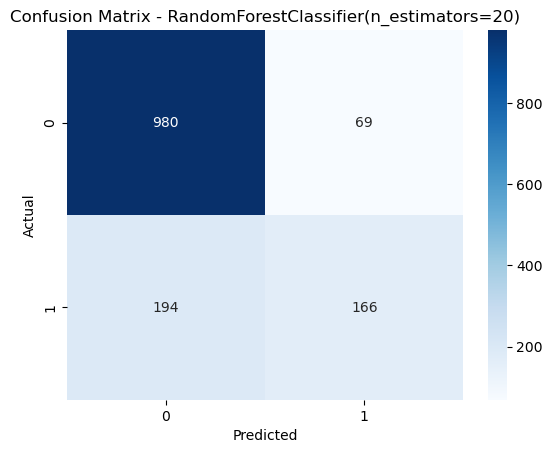

In [29]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {rf_model}')
plt.show()


# 5. Model Interpretation

In [30]:
import shap

In [31]:
print("Original DataFrame shape:", df.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("df.columns length:", len(df.columns))


Original DataFrame shape: (7043, 7073)
X_train shape: (5634, 7072)
X_test shape: (1409, 7072)
df.columns length: 7073


In [32]:
print(type(X_test))
X_test = pd.DataFrame(X_test)
print(X_test.dtypes)

<class 'numpy.ndarray'>
0       float64
1       float64
2       float64
3       float64
4       float64
         ...   
7067    float64
7068    float64
7069    float64
7070    float64
7071    float64
Length: 7072, dtype: object


In [33]:
X_test = X_test.fillna(0)

In [34]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,7062,7063,7064,7065,7066,7067,7068,7069,7070,7071
0,-0.439475,-0.742741,-0.460354,-0.689394,-0.013324,0.0,-0.013324,-0.013324,0.0,-0.013324,...,-0.529854,1.274412,-0.529854,1.259673,-0.515541,-0.556985,0.840688,-0.521604,1.402992,-0.547680
1,-0.439475,-0.129762,-1.496157,-0.773946,-0.013324,0.0,-0.013324,-0.013324,0.0,-0.013324,...,1.887311,-0.784675,1.887311,-0.793857,-0.515541,1.795380,0.840688,-0.521604,-0.712762,1.825882
2,-0.439475,-1.273989,0.839380,-0.965190,-0.013324,0.0,-0.013324,-0.013324,0.0,-0.013324,...,-0.529854,1.274412,-0.529854,1.259673,-0.515541,-0.556985,0.840688,-0.521604,1.402992,-0.547680
3,-0.439475,1.504848,-1.333483,-0.244184,-0.013324,0.0,-0.013324,-0.013324,0.0,-0.013324,...,1.887311,-0.784675,1.887311,-0.793857,-0.515541,1.795380,-1.189503,-0.521604,-0.712762,-0.547680
4,-0.439475,0.238025,0.651807,0.440512,-0.013324,0.0,-0.013324,-0.013324,0.0,-0.013324,...,-0.529854,-0.784675,-0.529854,-0.793857,-0.515541,-0.556985,0.840688,1.917164,-0.712762,-0.547680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,-0.439475,-0.701876,0.394516,-0.493302,-0.013324,0.0,-0.013324,-0.013324,0.0,-0.013324,...,-0.529854,1.274412,-0.529854,1.259673,-0.515541,-0.556985,-1.189503,-0.521604,-0.712762,-0.547680
1405,-0.439475,-1.233124,-0.558290,-0.964061,-0.013324,0.0,-0.013324,-0.013324,0.0,-0.013324,...,-0.529854,-0.784675,-0.529854,-0.793857,-0.515541,-0.556985,0.840688,-0.521604,1.402992,-0.547680
1406,-0.439475,1.014465,-0.780722,-0.005052,-0.013324,0.0,-0.013324,-0.013324,0.0,-0.013324,...,-0.529854,-0.784675,-0.529854,-0.793857,1.939708,-0.556985,0.840688,1.917164,-0.712762,-0.547680
1407,-0.439475,0.810139,0.895818,1.044177,-0.013324,0.0,-0.013324,-0.013324,0.0,-0.013324,...,-0.529854,-0.784675,-0.529854,-0.793857,-0.515541,1.795380,0.840688,1.917164,-0.712762,-0.547680


In [35]:
explainer = shap.TreeExplainer(rf_model)
explainer

In [36]:
explainer = shap.Explainer(rf_model, X_test)
shap_values = explainer(X_test, check_additivity=False)


100%|===================| 2805/2818 [02:22<00:00]        

## Visualize SHAP summary plot

!pip install --upgrade shap


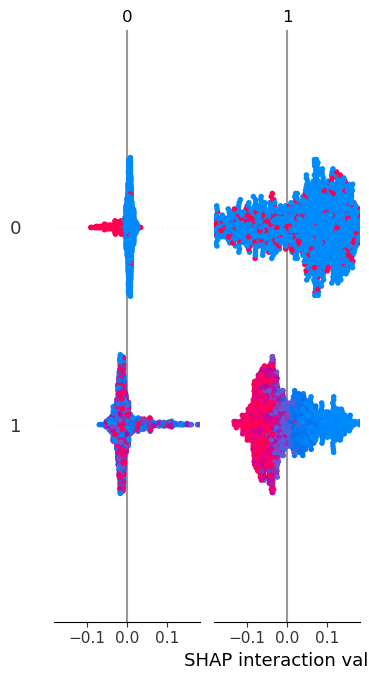

In [37]:
X_test.columns = X_test.columns.astype(str)
X_test = X_test.copy()
X_test.columns = list(X_test.columns)
shap.summary_plot(shap_values, X_test.values, feature_names=X_test.columns)





In [38]:
print(X_train.shape, X_test.shape)


(5634, 7072) (1409, 7072)
